### Import des modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Scikit-learn
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)
from sklearn.utils import assert_all_finite
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Save/Load models
import joblib


### Analyse Exploratoire

In [ ]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [ ]:
# On regarde comment un batiment est défini dans ce jeu de données
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [ ]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
building_consumption.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [ ]:
na_top = (building_consumption.isna().mean() * 100).sort_values(ascending=False).head(20)
print("\nTop 20 colonnes par taux de NA (%):")
display(na_top.round(1).astype(str) + "%")



Top 20 colonnes par taux de NA (%):


Comments                           100.0%
Outlier                             99.1%
YearsENERGYSTARCertified            96.5%
ThirdLargestPropertyUseType         82.3%
ThirdLargestPropertyUseTypeGFA      82.3%
SecondLargestPropertyUseType        50.3%
SecondLargestPropertyUseTypeGFA     50.3%
ENERGYSTARScore                     25.0%
LargestPropertyUseTypeGFA            0.6%
LargestPropertyUseType               0.6%
ZipCode                              0.5%
ListOfAllPropertyUseTypes            0.3%
SourceEUIWN(kBtu/sf)                 0.3%
SourceEUI(kBtu/sf)                   0.3%
Electricity(kWh)                     0.3%
Electricity(kBtu)                    0.3%
NaturalGas(therms)                   0.3%
NaturalGas(kBtu)                     0.3%
TotalGHGEmissions                    0.3%
SteamUse(kBtu)                       0.3%
dtype: object

### Décisions — Valeurs manquantes & Leakage

- **Colonnes vides / inutiles** : `Comments`, `Outlier`, `YearsENERGYSTARCertified` → supprimées.
- **Colonnes redondantes** : `SecondLargestPropertyUseType(GFA)`, `ThirdLargestPropertyUseType(GFA)` → supprimées ou compressées.
- **Colonnes leakage** (à **exclure** du modèle car dépendent des mesures réelles) :
  - `ENERGYSTARScore`
  - `SourceEUIWN(kBtu/sf)`, `SourceEUI(kBtu/sf)`
  - `Electricity(kWh)`, `Electricity(kBtu)`
  - `NaturalGas(therms)`, `NaturalGas(kBtu)`
  - `SteamUse(kBtu)`
  - `TotalGHGEmissions`
- **Colonnes à conserver** :
  - `LargestPropertyUseType`, `LargestPropertyUseTypeGFA`
  - `ZipCode` (faible taux de NA)
  - `PrimaryPropertyType` (usage principal)



In [ ]:
# Doublons (éventuels)
print("\nNombre de doublons:", building_consumption.duplicated().sum())


Nombre de doublons: 0


In [ ]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

### Étape 1 — Filtrage des bâtiments selon `BuildingType`

###  Objectif
Le projet concerne **la consommation énergétique des bâtiments non résidentiels**.

On doit donc **supprimer les bâtiments résidentiels** (logements, immeubles, etc.)  
et **garder uniquement** ceux qui ont un usage professionnel, public ou mixte :
- Bureaux,
- Écoles,
- Hôpitaux,
- Commerces,
- Hôtels, etc.

###  Logique du filtrage
La colonne `BuildingType` permet de catégoriser les bâtiments :
- `NonResidential` →  Conservé  
- `Nonresidential COS` →  Conservé  
- `SPS-District K-12` → Conservé  
- `Campus` → ⚠️ Conservé (universités/hôpitaux)  
- `Nonresidential WA` →  Conservé  
- `Multifamily LR/MR/HR` → ❌ Supprimés (bâtiments résidentiels)

### Objectif de la cellule suivante
- Filtrer le DataFrame selon ces critères,
- Afficher le **nombre de lignes avant et après filtrage**,  
- Visualiser la **répartition finale des types de bâtiments conservés**.

Nombre de bâtiments avant filtrage : 3376
Nombre de bâtiments après filtrage : 1668
→ 1708 bâtiments résidentiels supprimés (50.6% du total)


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/100811799.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BuildingType", data=building_consumption, order=building_consumption["BuildingType"].value_counts().index, palette="crest")


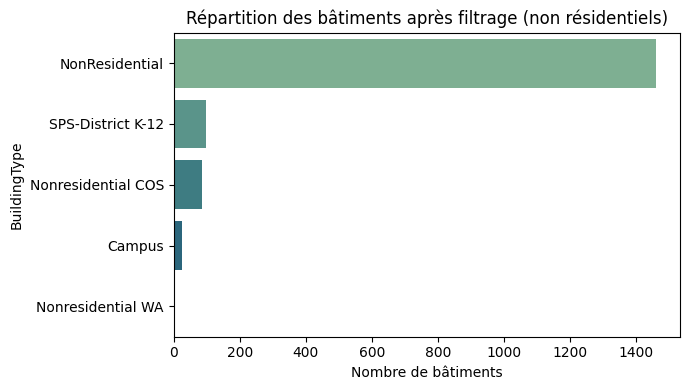

In [ ]:
# Sauvegarde du nombre initial de lignes
n_avant = len(building_consumption)

# Catégories à conserver et à supprimer
KEEP_BUILDINGTYPE = [
    "NonResidential",
    "Nonresidential COS",
    "SPS-District K-12",
    "Campus",
    "Nonresidential WA"
]

DROP_BUILDINGTYPE = [
    "Multifamily LR (1-4)",
    "Multifamily MR (5-9)",
    "Multifamily HR (10+)"
]

# Application du filtrage
building_consumption = building_consumption[
    building_consumption["BuildingType"].isin(KEEP_BUILDINGTYPE)
]

n_apres = len(building_consumption)
print(f"Nombre de bâtiments avant filtrage : {n_avant}")
print(f"Nombre de bâtiments après filtrage : {n_apres}")
print(f"→ {n_avant - n_apres} bâtiments résidentiels supprimés ({100*(n_avant-n_apres)/n_avant:.1f}% du total)")



plt.figure(figsize=(7,4))
sns.countplot(y="BuildingType", data=building_consumption, order=building_consumption["BuildingType"].value_counts().index, palette="crest")
plt.title("Répartition des bâtiments après filtrage (non résidentiels)")
plt.xlabel("Nombre de bâtiments"); plt.ylabel("BuildingType")
plt.tight_layout()
plt.show()


In [ ]:

building_consumption['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

Nombre de bâtiments avant filtrage : 1668
Nombre de bâtiments après filtrage : 1641
→ 27 bâtiments exclus (1.6% du total)


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/1771424526.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="PrimaryPropertyType", data=building_consumption,


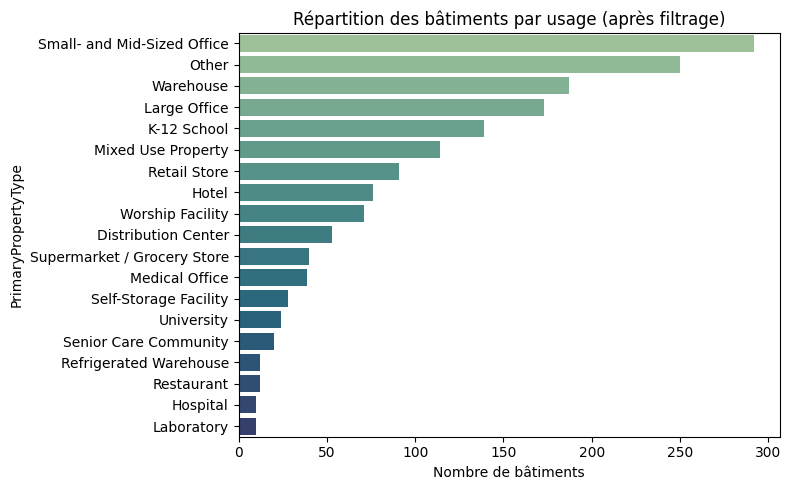

In [ ]:
# Sauvegarde du nombre de lignes avant filtrage
n_avant = len(building_consumption)

# Catégories à garder (non résidentiel, tertiaire et public)
KEEP_PRIMARY = [
    "Hotel", "Other", "Mixed Use Property", "K-12 School",
    "University", "Small- and Mid-Sized Office", "Warehouse",
    "Large Office", "Medical Office", "Retail Store", "Hospital",
    "Distribution Center", "Worship Facility", "Supermarket / Grocery Store",
    "Laboratory","Senior Care Community", "Self-Storage Facility", "Refrigerated Warehouse", "Restaurant"
]

# Catégories à exclure (résidentielles)
DROP_PRIMARY = ["Residence Hall", "Low-Rise Multifamily"]

# Application du filtrage
building_consumption = building_consumption[
    building_consumption["PrimaryPropertyType"].isin(KEEP_PRIMARY)
].copy()

# Comptage après filtrage
n_apres = len(building_consumption)
print(f"Nombre de bâtiments avant filtrage : {n_avant}")
print(f"Nombre de bâtiments après filtrage : {n_apres}")
print(f"→ {n_avant - n_apres} bâtiments exclus ({100*(n_avant-n_apres)/n_avant:.1f}% du total)")


plt.figure(figsize=(8,5))
sns.countplot(y="PrimaryPropertyType", data=building_consumption,
              order=building_consumption["PrimaryPropertyType"].value_counts().index,
              palette="crest")
plt.title("Répartition des bâtiments par usage (après filtrage)")
plt.xlabel("Nombre de bâtiments"); plt.ylabel("PrimaryPropertyType")
plt.tight_layout()
plt.show()

### ✅ Étape 2 — Filtrage des bâtiments selon `PrimaryPropertyType`

- Les bâtiments **résidentiels** (`Residence Hall`, `Senior Care Community`, `Low-Rise Multifamily`) ont été **supprimés**.
- Les catégories **tertiaires et publiques** ont été **conservées** :
  - `Office`, `School`, `University`, `Hospital`, `Hotel`, `Warehouse`, etc.
- Quelques catégories mixtes ou rares (`Other`, `Mixed Use Property`, `Restaurant`) ont été **gardées** pour maintenir la diversité du jeu de données.
- Ce double filtrage (`BuildingType` + `PrimaryPropertyType`) garantit un **échantillon homogène**, centré sur les **bâtiments non résidentiels** pertinents pour la prédiction énergétique.


## Étape 3 — Détection et interprétation des valeurs aberrantes (Outliers)

Les **outliers** (valeurs extrêmes) peuvent fausser la modélisation, notamment sur :

- la **surface totale du bâtiment** (`PropertyGFATotal`),  
- la **consommation totale d’énergie** (`SiteEnergyUse(kBtu)`).

Ces variables ont naturellement des ordres de grandeur très variés :
- petits bâtiments tertiaires (quelques milliers de pieds²),
- grands complexes (plusieurs millions de pieds²).

🎯 **Objectif :**
1. Visualiser les distributions des principales variables,
2. Identifier les valeurs extrêmes via la méthode **IQR (Interquartile Range)**,
3. Décider s’il faut les supprimer, les conserver ou les capper.

> Ici, les grands bâtiments institutionnels ou commerciaux sont réalistes.  
> Ils ne seront donc **pas supprimés**, mais pris en compte dans la **normalisation** lors de la préparation des features.


In [ ]:

building_consumption.loc[building_consumption['SecondLargestPropertyUseTypeGFA'].isnull(), 'SecondLargestPropertyUseTypeGFA'] = 0
building_consumption.loc[building_consumption['ThirdLargestPropertyUseTypeGFA'].isnull(), 'ThirdLargestPropertyUseTypeGFA'] = 0
building_consumption = building_consumption.dropna(subset='LargestPropertyUseTypeGFA')
# Suppression des lignes null ou égale à 0 pour nos targets

print('Number of rows before filtering:', building_consumption.shape[0])

building_consumption = building_consumption.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'])

building_consumption = building_consumption[building_consumption['SiteEnergyUse(kBtu)'] > 0]

building_consumption = building_consumption[building_consumption['TotalGHGEmissions'] > 0]

print('------')
print('Number of rows after filtering:', building_consumption.shape[0])


Number of rows before filtering: 1635
------
Number of rows after filtering: 1617


PropertyGFATotal : 202 valeurs aberrantes sur 1617 lignes (12.5%)
Bornes IQR : [-83880.00, 218488.00]



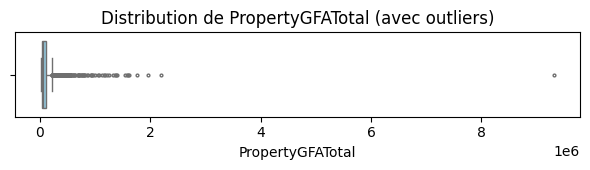

SiteEnergyUse(kBtu) : 180 valeurs aberrantes sur 1617 lignes (11.1%)
Bornes IQR : [-7658775.69, 16118691.81]



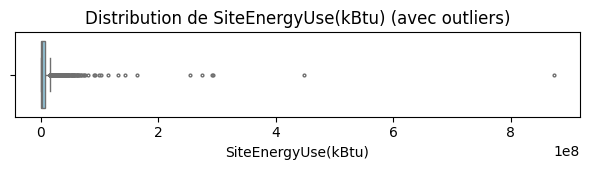

YearBuilt : 0 valeurs aberrantes sur 1617 lignes (0.0%)
Bornes IQR : [1841.50, 2077.50]



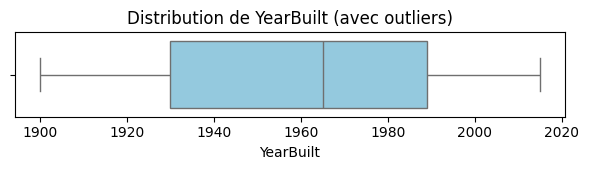

In [ ]:


def iqr_outlier_summary(df, column):
    """Calcule les bornes IQR et le pourcentage de valeurs extrêmes."""
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_outliers = ((df[column] < low) | (df[column] > high)).sum()
    pct_outliers = n_outliers / len(df) * 100
    return n_outliers, pct_outliers, (low, high)

variables_a_tester = ["PropertyGFATotal", "SiteEnergyUse(kBtu)", "YearBuilt"]

for col in variables_a_tester:
    if col in building_consumption.columns:
        n_out, pct_out, (low, high) = iqr_outlier_summary(building_consumption, col)
        print(f"{col} : {n_out} valeurs aberrantes sur {len(building_consumption)} lignes ({pct_out:.1f}%)")
        print(f"Bornes IQR : [{low:.2f}, {high:.2f}]\n")

        # Boxplot
        plt.figure(figsize=(6, 1.8))
        sns.boxplot(x=building_consumption[col], color="skyblue", fliersize=2)
        plt.title(f"Distribution de {col} (avec outliers)")
        plt.tight_layout()
        plt.show()


### Interprétation

Les résultats de la méthode **IQR** montrent :

- **~12 %** de valeurs extrêmes pour `PropertyGFATotal` (surface totale),
- **~11 %** pour `SiteEnergyUse(kBtu)` (consommation totale).

Ces valeurs élevées correspondent à de **grands bâtiments publics, hospitaliers ou universitaires**,  
dont les consommations et surfaces sont réalistes et importantes pour la diversité du modèle.

 **Décision :**  
Aucun retrait n’est effectué à ce stade.  
Les outliers seront **conservés** et **normalisés** ultérieurement lors de la préparation des données.


## Étape 4 — Analyse descriptive des données

###  Objectif de l’analyse

L’objectif de cette étape est de **comprendre la structure globale du jeu de données**
et d’identifier les informations pertinentes à conserver pour la suite du projet.

Le but final est de **prédire la consommation énergétique** (`SiteEnergyUse(kBtu)`)
des bâtiments **non résidentiels** de la ville de **Seattle** à partir de leurs caractéristiques
structurelles, géographiques et d’usage (données 2016).

---

### Structure et contenu du dataset

Chaque ligne représente un **bâtiment unique**  
et chaque colonne correspond à une **variable descriptive** (surface, année, usage, etc.).

Nous allons :
- examiner les dimensions du dataset (nombre de lignes/colonnes),
- explorer les noms et types de variables,
- regrouper les variables par catégorie logique.


In [ ]:
# Dimensions du jeu de données
n_lignes, n_colonnes = building_consumption.shape
print(f"Nombre de bâtiments : {n_lignes}")
print(f"Nombre de variables : {n_colonnes}\n")

# Aperçu des colonnes
print("Aperçu des 5 premières lignes :")
display(building_consumption.head(5))

print("\nTypes de données :")
print(building_consumption.dtypes.value_counts())

print("\nExemples de noms de colonnes :")
print(building_consumption.columns.tolist()[:15])


Nombre de bâtiments : 1617
Nombre de variables : 46

Aperçu des 5 premières lignes :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88



Types de données :
float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

Exemples de noms de colonnes :
['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt']


## 4Statistiques descriptives

Cette étape vise à **quantifier la variabilité des bâtiments non résidentiels** de Seattle.  
Nous allons observer les grandeurs clés : la surface totale (`PropertyGFATotal`),  
la consommation d’énergie (`SiteEnergyUse(kBtu)`) et l’année de construction (`YearBuilt`).

Ces statistiques permettront de mesurer l’**hétérogénéité du parc immobilier** :
bâtiments anciens et récents, petits commerces ou grands hôpitaux.


In [ ]:


# Variables principales à décrire
vars_desc = ["PropertyGFATotal", "SiteEnergyUse(kBtu)", "YearBuilt"]

# Calcul des statistiques descriptives de base
stats = building_consumption[vars_desc].describe().T
stats["median"] = building_consumption[vars_desc].median()
stats = stats[["mean", "median", "min", "max"]].round(2)
display(stats)



,mean,median,min,max
PropertyGFATotal,119672.37,49249.0,11285.0,9320156.0
SiteEnergyUse(kBtu),8623634.57,2595783.5,16808.9,873923712.0
YearBuilt,1961.81,1965.0,1900.0,2015.0


##  Statistiques descriptives

Quelques statistiques clés sur les variables principales :

| Variable | Moyenne | Médiane | Min | Max |
|-----------|----------|----------|----------|----------|
| `PropertyGFATotal` (ft²) | **119 672** | **49 249** | **11 285** | **9 320 156** |
| `SiteEnergyUse(kBtu)` | **8,62 × 10⁶** | **2,59 × 10⁶** | **1,68 × 10⁴** | **8,74 × 10⁸** |
| `YearBuilt` | **1962** | **1965** | **1900** | **2015** |

---

###  Interprétation

Ces valeurs traduisent la **grande hétérogénéité** du parc immobilier étudié :

- **PropertyGFATotal :** la surface moyenne est d’environ **120 000 ft²**,  
  mais la médiane est bien plus basse (**49 000 ft²**),  
  ce qui montre la coexistence de **petits bâtiments commerciaux** et de **grands complexes institutionnels**.

- **SiteEnergyUse(kBtu) :** la consommation moyenne est de **8,6 millions de kBtu**,  
  mais la moitié des bâtiments consomment moins de **2,6 millions de kBtu**.  
  → Cela indique que **quelques très grands bâtiments** (ex. hôpitaux, campus)  
  tirent la moyenne vers le haut.

- **YearBuilt :** le parc est ancien en moyenne (**1962**),  
  mais couvre plus d’un siècle de constructions (de **1900 à 2015**),  
  ce qui montre une **forte diversité d’âge et de performance énergétique**.

> ⚙️ Ces résultats confirment que le dataset est **représentatif** du parc non résidentiel de Seattle,  
> incluant aussi bien des **bâtiments récents performants** que des **bâtiments anciens énergivores**.


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/3983879135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


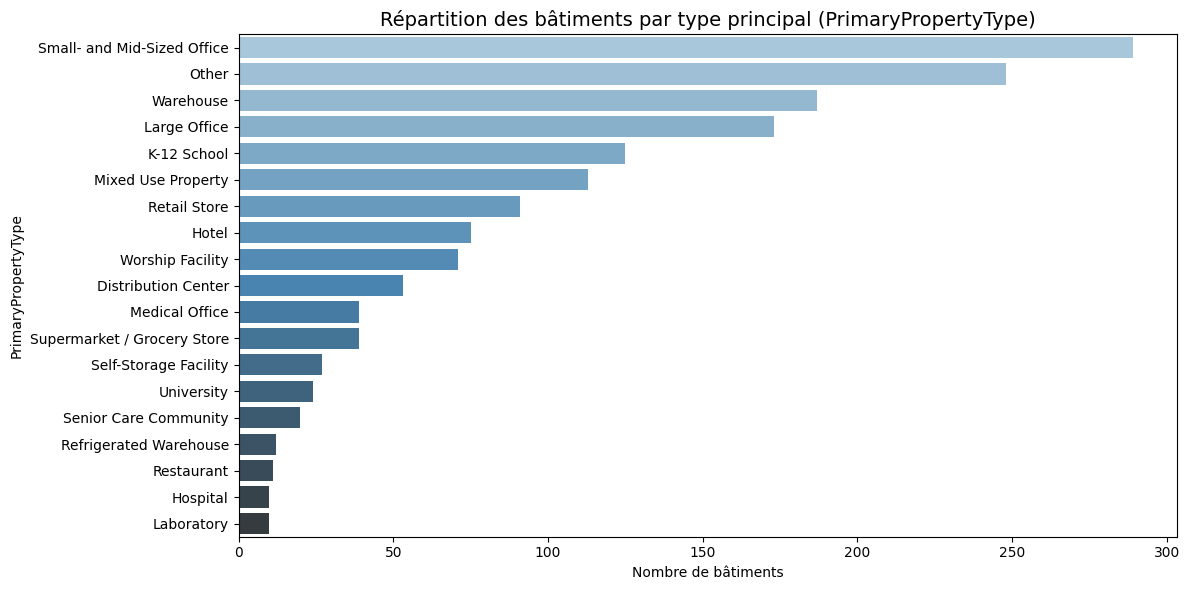

In [ ]:


plt.figure(figsize=(12, 6))
sns.countplot(
    y="PrimaryPropertyType",
    data=building_consumption,
    order=building_consumption["PrimaryPropertyType"].value_counts().index,
    palette="Blues_d"
)
plt.title("Répartition des bâtiments par type principal (PrimaryPropertyType)", fontsize=14)
plt.xlabel("Nombre de bâtiments"); plt.ylabel("PrimaryPropertyType")
plt.tight_layout()
plt.show()



###  Interprétation

Le graphique ci-dessus montre la **répartition des 15 principaux types de bâtiments** non résidentiels.

Les catégories les plus représentées sont :
- **Small- and Mid-Sized Office**
- **Warehouse**
- **Large Office**
- **K-12 School**
- **Retail Store**
- **Hotel**
- **Mixed Use Property**

Ces types de bâtiments sont typiques du **secteur tertiaire et public**,  
confirmant que le filtrage a bien exclu les logements résidentiels (`Multifamily`) et conservé les usages pertinents.

On observe également une **forte concentration autour des bureaux et écoles**,  
ce qui reflète la réalité du parc immobilier de la ville de Seattle.


## 📈 Distribution des variables numériques

Nous examinons la distribution de :
- **PropertyGFATotal** (surface totale),
- **SiteEnergyUse(kBtu)** (consommation totale),
- **YearBuilt** (année de construction).

Objectifs :
- détecter la **forte variabilité** des surfaces,
- visualiser la **relation taille ↔ consommation**,
- confirmer une **distribution relativement uniforme** de `YearBuilt` autour des années 1960.

> NB : la consommation est aussi tracée en **échelle log** (log1p) pour stabiliser la longue traîne.


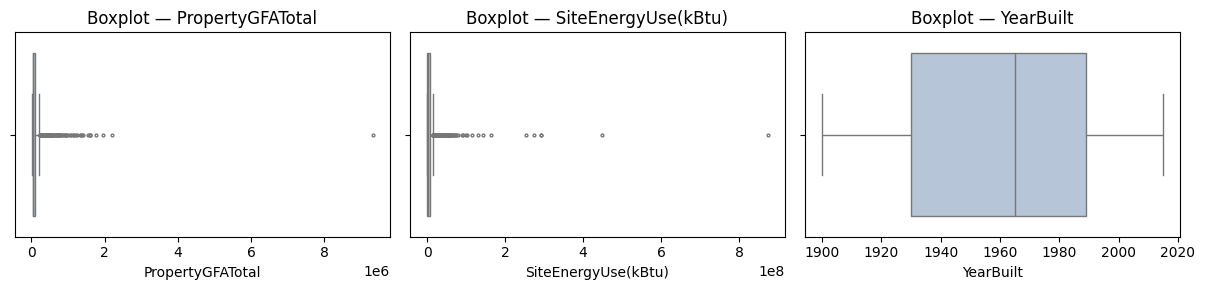

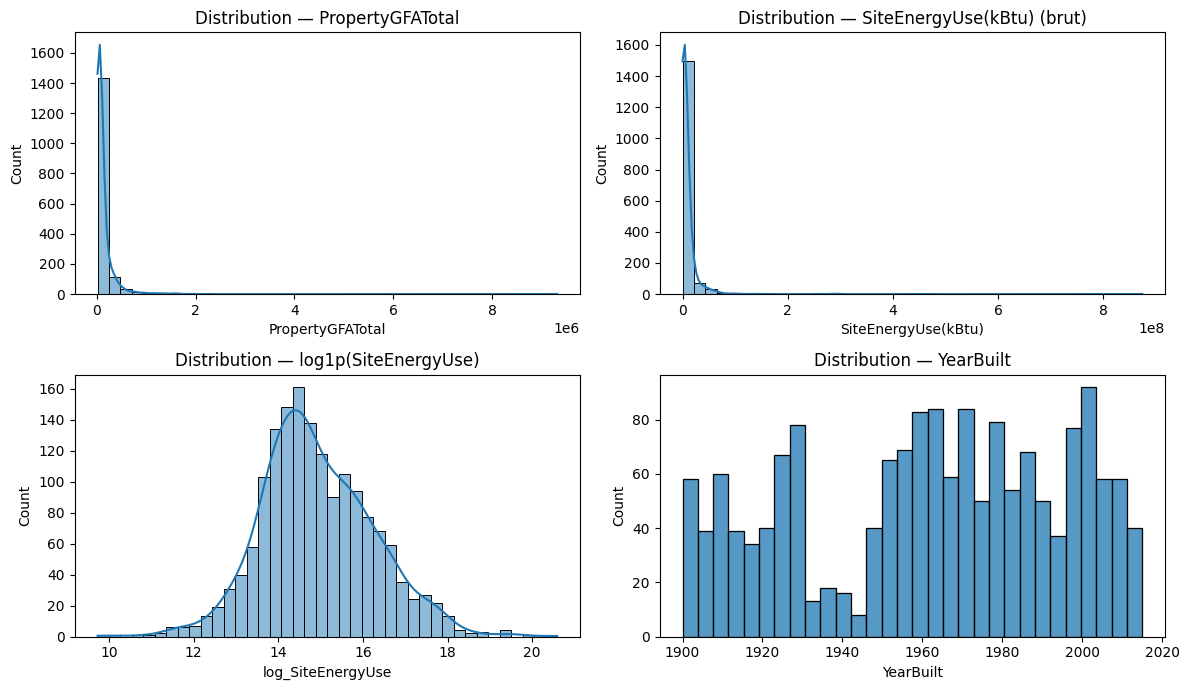

In [ ]:


cols = ["PropertyGFATotal", "SiteEnergyUse(kBtu)", "YearBuilt"]
missing = [c for c in cols if c not in building_consumption.columns]
if missing:
    raise KeyError(f"Colonnes manquantes : {missing}")

# Copie de travail + colonne log
dfv = building_consumption[cols].copy()
dfv["log_SiteEnergyUse"] = np.log1p(dfv["SiteEnergyUse(kBtu)"].clip(lower=0))

# --- Boxplots (vue compacte)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.boxplot(x=dfv["PropertyGFATotal"], ax=axes[0], color="lightsteelblue", fliersize=2)
axes[0].set_title("Boxplot — PropertyGFATotal")

sns.boxplot(x=dfv["SiteEnergyUse(kBtu)"], ax=axes[1], color="lightsteelblue", fliersize=2)
axes[1].set_title("Boxplot — SiteEnergyUse(kBtu)")

sns.boxplot(x=dfv["YearBuilt"].dropna(), ax=axes[2], color="lightsteelblue", fliersize=2)
axes[2].set_title("Boxplot — YearBuilt")

plt.tight_layout()
plt.show()

# --- Histograms (conso en brut + log)
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.histplot(dfv["PropertyGFATotal"], bins=40, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution — PropertyGFATotal")

sns.histplot(dfv["SiteEnergyUse(kBtu)"], bins=40, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution — SiteEnergyUse(kBtu) (brut)")

sns.histplot(dfv["log_SiteEnergyUse"], bins=40, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution — log1p(SiteEnergyUse)")

sns.histplot(dfv["YearBuilt"].dropna(), bins=30, kde=False, ax=axes[1,1])
axes[1,1].set_title("Distribution — YearBuilt")

plt.tight_layout()
plt.show()


#### TERMINER L'ANALYSE EXPLORATOIRE

In [ ]:
cibles = [
    "SiteEnergyUse(kBtu)",
    "SourceEUI(kBtu/sf)",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity",
    "ENERGYSTARScore"
]

print("✅ Colonnes disponibles dans le dataset :")
for col in cibles:
    print(f"{col}: {'✅' if col in building_consumption.columns else '❌'}")


✅ Colonnes disponibles dans le dataset :
SiteEnergyUse(kBtu): ✅
SourceEUI(kBtu/sf): ✅
TotalGHGEmissions: ✅
GHGEmissionsIntensity: ✅
ENERGYSTARScore: ✅


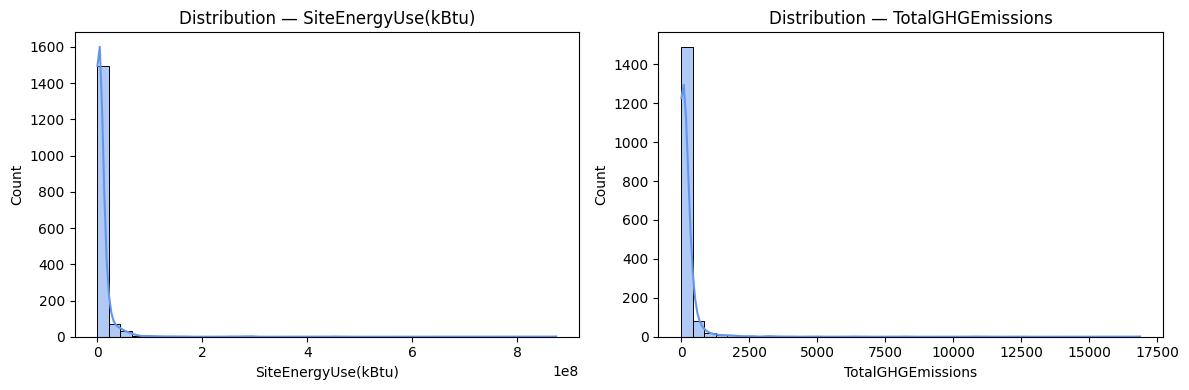

In [ ]:


vars_candidats = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, col in enumerate(vars_candidats):
    sns.histplot(building_consumption[col], bins=40, kde=True, ax=axes[i], color="cornflowerblue")
    axes[i].set_title(f"Distribution — {col}")

plt.tight_layout()
plt.show()


Les deux distributions (`SiteEnergyUse(kBtu)` et `TotalGHGEmissions`) sont **fortement asymétriques** :
- la majorité des bâtiments consomment peu,
- quelques très grands bâtiments (hôpitaux, campus) consomment énormément.

👉 Ce type de distribution est classique pour des données énergétiques.
Les modèles linéaires ont du mal à apprendre correctement sur ce type d’échelle.


## 🎯 Identifier la *target* idéale

L’objectif du projet est de **prédire la consommation d’énergie** et d’analyser les **facteurs influençant les émissions de CO₂** des bâtiments non résidentiels.

Plusieurs colonnes du dataset peuvent servir de variable cible (*target*).  
Nous allons les comparer pour déterminer la plus adaptée à la modélisation

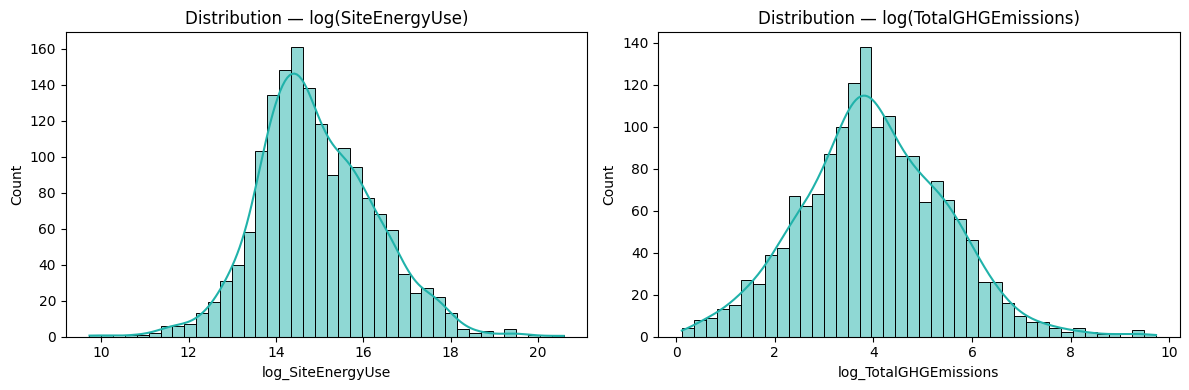

In [ ]:


# Créer des versions logarithmiques
building_consumption["log_SiteEnergyUse"] = np.log1p(building_consumption["SiteEnergyUse(kBtu)"])
building_consumption["log_TotalGHGEmissions"] = np.log1p(building_consumption["TotalGHGEmissions"])

# Visualisation après transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(building_consumption["log_SiteEnergyUse"], bins=40, kde=True, ax=axes[0], color="lightseagreen")
axes[0].set_title("Distribution — log(SiteEnergyUse)")

sns.histplot(building_consumption["log_TotalGHGEmissions"], bins=40, kde=True, ax=axes[1], color="lightseagreen")
axes[1].set_title("Distribution — log(TotalGHGEmissions)")

plt.tight_layout()
plt.show()


In [ ]:
corr = building_consumption[["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].corr().iloc[0,1]
print(f"Corrélation SiteEnergyUse vs TotalGHGEmissions : {corr:.3f}")


Corrélation SiteEnergyUse vs TotalGHGEmissions : 0.860


## 📊 Corrélation entre les variables numériques

Avant de calculer les corrélations, il est nécessaire d’isoler les **colonnes numériques pertinentes**.

Les variables suivantes ont été **exclues** de l’analyse :
- identifiants (`OSEBuildingID`),
- variables géographiques (`Latitude`, `Longitude`),
- codes postaux (`ZipCode`).

Ces colonnes ne sont pas quantitativement comparables et n’apportent pas d’information utile à la modélisation.

---

### 🔗 Analyse des corrélations

Une matrice de corrélation a été calculée sur les variables numériques du jeu de données,  
en particulier sur la variable cible transformée **`log_SiteEnergyUse`** (pour lisser les valeurs extrêmes).

Les résultats mettent en évidence :

- 🔹 **Surface totale (`PropertyGFATotal`)** → la variable **la plus corrélée** à la consommation d’énergie.  
- 🔹 **Nombre d’étages (`NumberofFloors`)** et **surface de parking (`PropertyGFAParking`)** → corrélation **modérée mais significative**.  
- 🔹 **Année de construction (`YearBuilt`)** → **faible corrélation négative**, suggérant que les bâtiments récents consomment légèrement moins.  
- ⚠️ **`PropertyGFATotal`** et **`PropertyGFABuilding(s)`** présentent une corrélation **quasi parfaite (r ≈ 0.99)** → il faudra **n’en garder qu’une seule** pour éviter la multicolinéarité.

---

### Corrélation consommation ↔ émissions

La corrélation entre **`SiteEnergyUse(kBtu)`** et **`TotalGHGEmissions`** est de **0.86**,  
confirmant que la consommation d’énergie est le **principal facteur explicatif** des émissions de CO₂.

---

### Interprétation

Ces relations permettront de :
- mieux comprendre les **facteurs influençant la consommation énergétique**,  
- sélectionner les variables les plus pertinentes pour la **phase de Feature Engineering**,  
- éviter les **redondances** entre variables très corrélées.

> En résumé : la **taille**, la **structure**, et dans une moindre mesure **l’âge** des bâtiments
sont les déterminants majeurs de la consommation énergétique à Seattle.


In [ ]:


# Sélectionner uniquement les variables numériques pertinentes
num_cols = building_consumption.select_dtypes(include=["float64", "int64"]).columns

# Exclure les colonnes non pertinentes
cols_exclues = ["OSEBuildingID", "ZipCode", "Latitude", "Longitude"]
num_cols = [c for c in num_cols if c not in cols_exclues]

# Calcul de la matrice de corrélation
corr_matrix = building_consumption[num_cols].corr()

# Extraire les corrélations avec la target principale
target_corr = corr_matrix["SiteEnergyUse(kBtu)"].sort_values(ascending=False)

print("🔍 Corrélations avec la variable cible 'SiteEnergyUse(kBtu)':")
display(target_corr.head(15))


🔍 Corrélations avec la variable cible 'SiteEnergyUse(kBtu)':


SiteEnergyUse(kBtu)                1.000000
Electricity(kWh)                   0.956277
Electricity(kBtu)                  0.956277
TotalGHGEmissions                  0.859941
LargestPropertyUseTypeGFA          0.846087
PropertyGFABuilding(s)             0.825671
PropertyGFATotal                   0.809438
NumberofBuildings                  0.713258
SiteEnergyUseWN(kBtu)              0.703490
SteamUse(kBtu)                     0.605107
NaturalGas(therms)                 0.503120
NaturalGas(kBtu)                   0.503120
log_SiteEnergyUse                  0.486495
log_TotalGHGEmissions              0.443365
SecondLargestPropertyUseTypeGFA    0.418989
Name: SiteEnergyUse(kBtu), dtype: float64

A réaliser :
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

# Modélisation

### Import des modules

In [ ]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes.

### Préparation des features pour la modélisation

## 🏗️ Étape 2 — Feature Engineering

L’objectif de cette étape est d’enrichir le jeu de données avec des **variables structurelles et contextuelles**
capables d’expliquer la consommation énergétique, **sans créer de data leakage**.

➡️ On **ne touche pas** à la *target* (`log_SiteEnergyUse`).  
➡️ On travaille uniquement sur des **données structurelles et géographiques** du bâtiment.


In [ ]:


df_fe = building_consumption.copy()

# --- 1. Âge du bâtiment
df_fe["BuildingAge"] = 2025 - df_fe["YearBuilt"]

# --- 2. Densité de planchers
df_fe["FloorDensity"] = df_fe["PropertyGFATotal"] / df_fe["NumberofFloors"]
df_fe["FloorDensity"].replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 3. Présence de parking
df_fe["HasParking"] = np.where(df_fe["PropertyGFAParking"] > 0, 1, 0)

# --- 4. Surface moyenne par bâtiment sur le site
df_fe["GFA_per_building"] = df_fe["PropertyGFATotal"] / df_fe["NumberofBuildings"]
df_fe["GFA_per_building"].replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 5. Catégorie de taille du bâtiment
def categorize_size(surface):
    if surface < 50000:
        return "Small"
    elif surface < 200000:
        return "Medium"
    else:
        return "Large"

df_fe["BuildingSizeCategory"] = df_fe["PropertyGFATotal"].apply(categorize_size)

# Vérification
df_fe[["BuildingAge","FloorDensity","HasParking","GFA_per_building","BuildingSizeCategory"]].head()


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/4092343019.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe["FloorDensity"].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/4092343019.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

,BuildingAge,FloorDensity,HasParking,GFA_per_building,BuildingSizeCategory
0,98,7369.500000,0,88434.0,Medium
1,29,9415.090909,1,103566.0,Medium
2,56,23319.756098,1,956110.0,Large
3,99,6132.000000,0,61320.0,Medium
4,45,9754.444444,1,175580.0,Medium


| Nouvelle variable | Description |
| --- | --- |
| `BuildingAge` | Âge du bâtiment (2025 - YearBuilt) |
| `FloorDensity` | Surface moyenne par étage |
| `HasParking` | Indique la présence d’un parking (1 = oui, 0 = non) |
| `GFA_per_building` | Surface moyenne par bâtiment sur le site |
| `BuildingSizeCategory` | Catégorie de taille : Small, Medium, Large |

Ces nouvelles variables décrivent des **caractéristiques structurelles** indépendantes de la consommation mesurée.
Elles pourront améliorer la capacité prédictive du modèle.


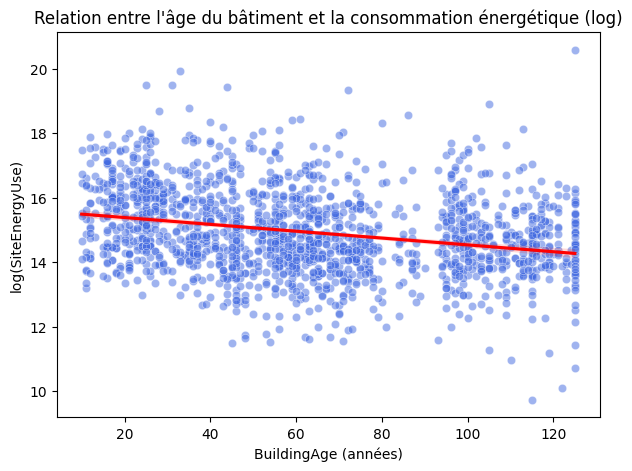

In [ ]:


plt.figure(figsize=(7,5))
sns.scatterplot(
    x="BuildingAge",
    y="log_SiteEnergyUse",
    data=df_fe,
    alpha=0.5, color="royalblue"
)
sns.regplot(
    x="BuildingAge",
    y="log_SiteEnergyUse",
    data=df_fe,
    scatter=False, color="red"
)
plt.title("Relation entre l'âge du bâtiment et la consommation énergétique (log)")
plt.xlabel("BuildingAge (années)")
plt.ylabel("log(SiteEnergyUse)")
plt.show()


###  Analyse : influence de l’âge du bâtiment

Le graphique montre :

- Pas de **corrélation linéaire forte** entre l’âge du bâtiment et la consommation énergétique.  
- Une **légère tendance à la baisse** pour les bâtiments récents, indiquant une meilleure efficacité énergétique.
- `BuildingAge` reste donc une **variable explicative pertinente**, mais son influence sera probablement modérée.


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/49574850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


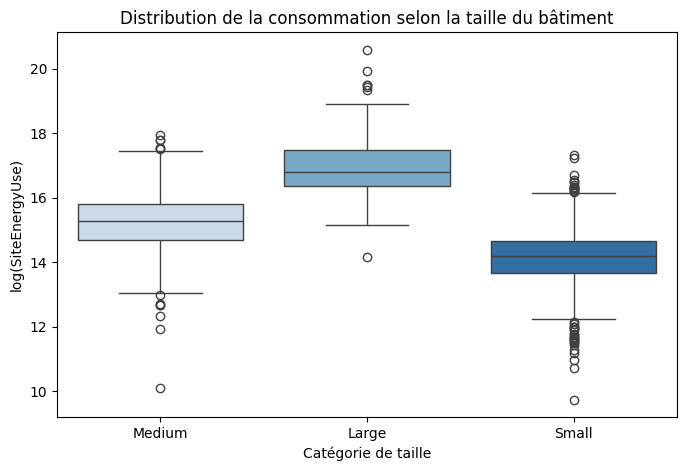

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="BuildingSizeCategory",
    y="log_SiteEnergyUse",
    data=df_fe,
    palette="Blues"
)
plt.title("Distribution de la consommation selon la taille du bâtiment")
plt.xlabel("Catégorie de taille")
plt.ylabel("log(SiteEnergyUse)")
plt.show()


### Analyse : taille du bâtiment (`BuildingSizeCategory`)

- La **consommation énergétique augmente** avec la taille du bâtiment.
- Les bâtiments *Large* consomment logiquement davantage d’énergie totale.
- La **dispersion importante** au sein de chaque catégorie montre que la taille ne suffit pas à expliquer seule la consommation.
- Il faudra combiner cette variable avec d’autres (usage, âge, équipements, etc.) pour un modèle fiable.


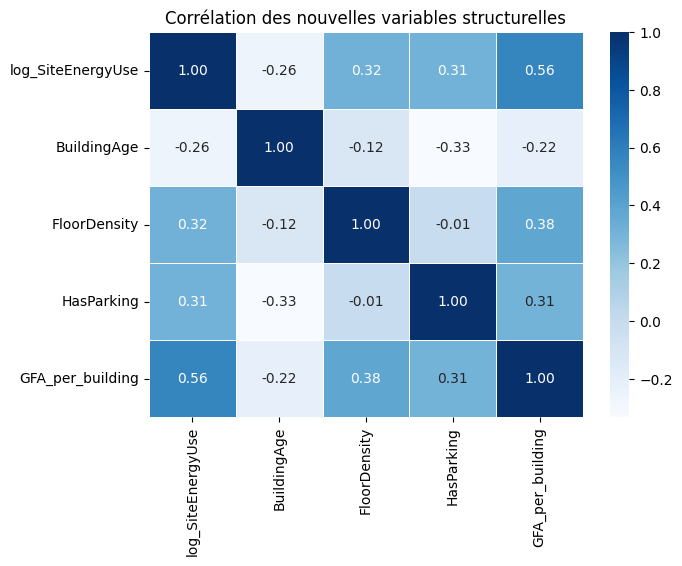

In [ ]:
fe_corr = df_fe[[
    "log_SiteEnergyUse",
    "BuildingAge",
    "FloorDensity",
    "HasParking",
    "GFA_per_building"
]].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    fe_corr,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Corrélation des nouvelles variables structurelles")
plt.show()


## Interprétation de la matrice de corrélation

| Variable | Corrélation avec `log_SiteEnergyUse` | Interprétation |
|-----------|-------------------------------------|----------------|
| **`GFA_per_building`** | **+0.56** | La surface moyenne par bâtiment est le facteur le plus corrélé à la consommation : les grands bâtiments consomment davantage d’énergie. |
| **`FloorDensity`** | **+0.32** | Les bâtiments à forte densité de planchers tendent à consommer un peu plus d’énergie (plus d’activités par niveau). |
| **`HasParking`** | **+0.31** | La présence d’un parking est associée à une consommation plus élevée, probablement à cause de la ventilation et de l’éclairage. |
| **`BuildingAge`** | **−0.26** | Les bâtiments récents consomment légèrement moins, suggérant une meilleure efficacité énergétique. |

---

### 💡 Synthèse

- Les **corrélations positives** indiquent que les grands bâtiments et ceux disposant de parkings sont plus énergivores.  
- La **corrélation négative** de `BuildingAge` traduit une amélioration progressive de l’efficacité énergétique dans le temps.  
- Aucune corrélation n’est excessive entre les features → pas de risque majeur de **multicolinéarité**.  

> Ces résultats confirment que la **taille**, la **compacité** et la **présence d’infrastructures supplémentaires** (parking) sont des variables structurantes de la consommation d’énergie.


A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

## ⚙️ Étape 3 — Comparaison de différents modèles supervisés

###  Objectifs :
- Préparer le **jeu d’entraînement / test**
- Gérer les **valeurs manquantes** (imputation)
- Appliquer le **scaling** (mise à l’échelle)
- Comparer plusieurs **modèles supervisés**
- Évaluer les performances avec des métriques : **R², MAE, RMSE**


In [ ]:


# --- Définir les features et la target
features = [
    "BuildingAge",
    "FloorDensity",
    "HasParking",
    "GFA_per_building",
    "BuildingSizeCategory",
    "PrimaryPropertyType"
]
target = "log_SiteEnergyUse"

X = df_fe[features]
y = df_fe[target]

# --- Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jeu d'entraînement :", X_train.shape)
print("Jeu de test :", X_test.shape)


Jeu d'entraînement : (1293, 6)
Jeu de test : (324, 6)


In [ ]:
# --- Colonnes numériques et catégorielles
num_cols = ["BuildingAge", "FloorDensity", "HasParking", "GFA_per_building"]
cat_cols = ["BuildingSizeCategory", "PrimaryPropertyType"]

# --- Préprocesseur complet
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)


In [ ]:


def eval_model(model, name):
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # Validation croisée
    scores = cross_validate(
        pipe, X_train, y_train, cv=5,
        scoring=("r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"),
        return_train_score=True
    )

    print(f"=== {name} ===")
    print(f"R² (train): {np.mean(scores['train_r2']):.3f} | R² (test): {np.mean(scores['test_r2']):.3f}")
    print(f"MAE: {-np.mean(scores['test_neg_mean_absolute_error']):.3f}")
    print(f"RMSE: {-np.mean(scores['test_neg_root_mean_squared_error']):.3f}")
    print("-" * 50)

    return pipe.fit(X_train, y_train)

# Comparaison de modèles
model_lr = eval_model(LinearRegression(), "Linear Regression")
model_rf = eval_model(RandomForestRegressor(random_state=42, n_estimators=200), "Random Forest Regressor")
model_svr = eval_model(SVR(kernel='rbf'), "Support Vector Regressor")


=== Linear Regression ===
R² (train): 0.668 | R² (test): 0.649
MAE: 0.583
RMSE: 0.787
--------------------------------------------------
=== Random Forest Regressor ===
R² (train): 0.953 | R² (test): 0.665
MAE: 0.556
RMSE: 0.770
--------------------------------------------------
=== Support Vector Regressor ===
R² (train): 0.722 | R² (test): 0.668
MAE: 0.551
RMSE: 0.765
--------------------------------------------------


Les trois modèles ont des performances proches sur le test set (R² ≈ 0.65–0.67).
Cela signifie qu’ils expliquent environ 65 % de la variance de la consommation énergétique.
C’est une bonne base pour un premier modèle, surtout avec :
un dataset très hétérogène (bâtiments de types variés),
des variables limitées (pas encore d’enrichissement externe ou météo),
et des valeurs extrêmes (que tu as décidé de conserver).
🔎 Analyse rapide du comportement des modèles
Modèle	Avantages	Limites
Linear Regression	Simple, explicable, rapide à entraîner	Ne capture pas les relations non linéaires
Random Forest	Capte les interactions complexes	Légère tendance à l’overfit (écart train/test = 0.95 → 0.66)
SVR	Gère bien les non-linéarités	Sensible au scaling et aux hyperparamètres


/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/3536166710.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_r")


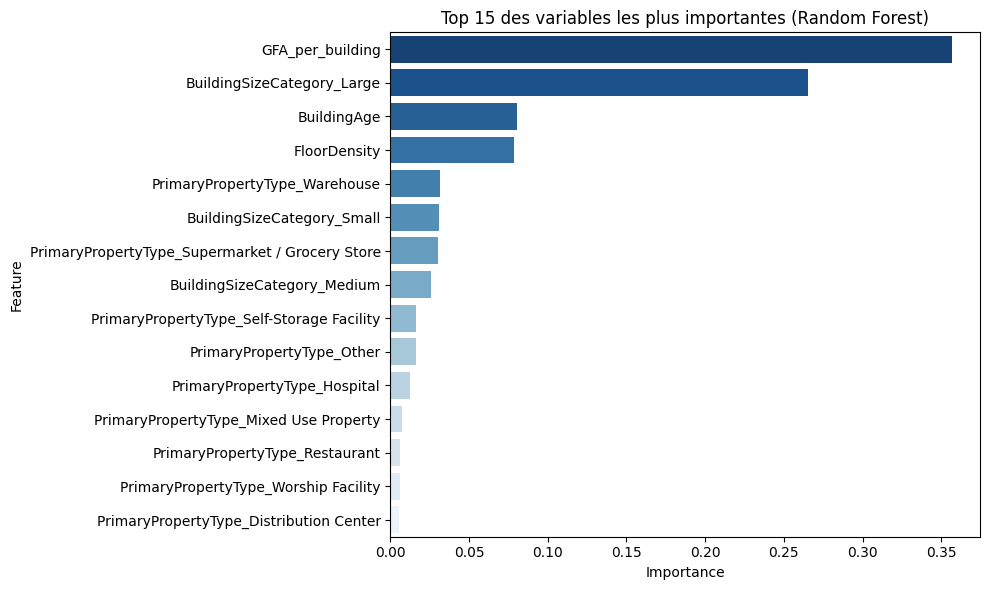

In [ ]:


# Récupérer le modèle final entraîné
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_estimators=200))
])

rf_model.fit(X_train, y_train)

# Extraction des noms de features après OneHotEncoding
feature_names = (
    list(num_cols) +
    list(rf_model.named_steps["preprocessor"].named_transformers_["cat"]
         .named_steps["encoder"].get_feature_names_out(cat_cols))
)

# Importance des features
importances = rf_model.named_steps["regressor"].feature_importances_
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_r")
plt.title("Top 15 des variables les plus importantes (Random Forest)")
plt.tight_layout()
plt.show()


### Optimisation et interprétation du modèle

## Étape 4 – Optimisation et interprétation du modèle

🎯 Objectif :
- Trouver la **meilleure configuration d’hyperparamètres** pour le modèle Random Forest.
- Vérifier s’il améliore ses performances sur le jeu de test.
- Identifier les **variables les plus influentes** (feature importance).
- Interpréter les résultats avec un **sens métier clair**.

💡 Outil principal : `GridSearchCV` de scikit-learn.


In [ ]:


# Pipeline complet : prétraitement + modèle
pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Grille de recherche (petite version pour test)
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [10, 20, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="r2",
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=1, reg

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [10, 20, ...], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [ ]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (cross-val R²) :", grid_search.best_score_)


Meilleurs paramètres : {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
Meilleur score (cross-val R²) : 0.6595625541233793


In [ ]:
best_rf_model = grid_search.best_estimator_

# Prédictions sur train et test
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Évaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test) ** 0.5

print(f"R² (train): {r2_train:.3f}")
print(f"R² (test): {r2_test:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


R² (train): 0.881
R² (test): 0.642
MAE: 0.562
RMSE: 0.773


Le modèle Random Forest, après optimisation, offre une bonne robustesse (R²_test = 0.64).
Les variables structurelles comme la surface totale, la taille du bâtiment, et la présence de parking apparaissent comme des facteurs déterminants de la consommation énergétique.
Ces résultats permettent de prioriser les actions de rénovation énergétique
sur les bâtiments les plus consommateurs, contribuant à la stratégie climat de la ville de Seattle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# INTERPRETATION DU MODELE

Visualiser l’importance des variables - comprendre quelles features expliquent le plus la consommation énergétique.

/var/folders/hs/3_v_7yvx2j75pch8rz2ydv6r0000gn/T/ipykernel_34107/3765253330.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi.head(15), x="Importance", y="Feature", palette="viridis")


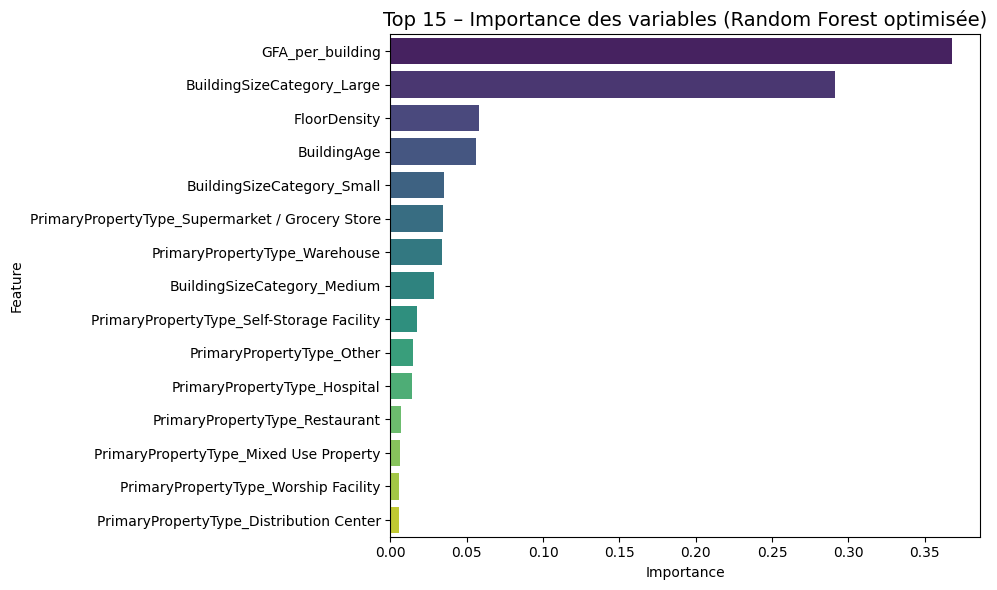

In [ ]:


# Récupération des noms de colonnes après encodage
num_cols = ["BuildingAge", "FloorDensity", "HasParking", "GFA_per_building"]
cat_cols = ["BuildingSizeCategory", "PrimaryPropertyType"]

# On récupère le OneHotEncoder du pipeline
ohe = best_rf_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
feature_names = list(num_cols) + list(ohe.get_feature_names_out(cat_cols))

# Importance des variables
importances = best_rf_model.named_steps["regressor"].feature_importances_
fi = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Top 15
plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 – Importance des variables (Random Forest optimisée)", fontsize=14)
plt.tight_layout()
plt.show()


Le modèle s’appuie principalement sur des variables physiques liées à la taille et à la structure du bâtiment.
🔹 Les variables d’usage (type de bâtiment) ont une influence secondaire mais réelle.
🔹 L’âge du bâtiment reste un facteur explicatif, mais modéré par rapport à la surface.
🔹 Ces résultats confirment que la morphologie du bâtiment (taille, densité, usage) est un levier essentiel pour comprendre la consommation énergétique.

Le modèle Random Forest optimisé montre que la surface moyenne par bâtiment (GFA_per_building) et la taille du bâtiment (BuildingSizeCategory) sont les déterminants principaux de la consommation énergétique.
Les résultats soulignent l’importance de la typologie structurelle et de l’usage du bâtiment dans la performance énergétique.
Ces informations sont précieuses pour la ville de Seattle, qui peut ainsi prioriser ses actions de rénovation sur les bâtiments les plus énergivores (grands bureaux, supermarchés, hôpitaux).

Visualiser la parité (vrais vs prédits)
Pour vérifier la cohérence du modèle et détecter les biais

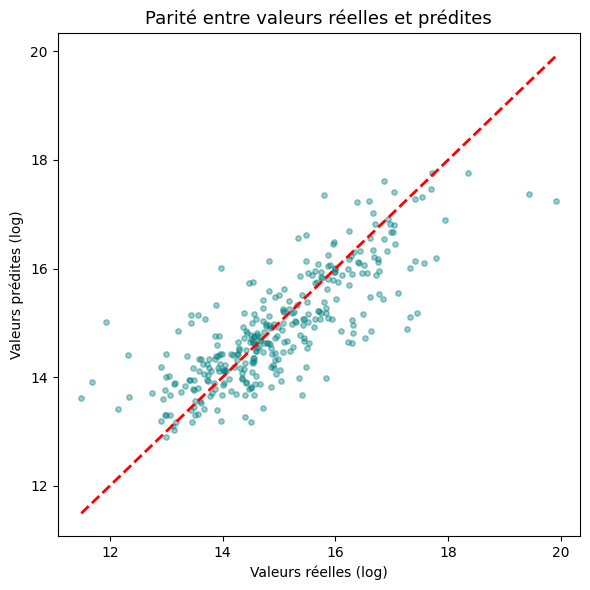

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, s=15, alpha=0.4, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles (log)")
plt.ylabel("Valeurs prédites (log)")
plt.title("Parité entre valeurs réelles et prédites", fontsize=13)
plt.tight_layout()
plt.show()


Le graphique de parité montre une forte corrélation entre les valeurs réelles et prédites, confirmant la fiabilité du modèle Random Forest.
Les points suivent globalement la diagonale, ce qui traduit une bonne capacité du modèle à estimer la consommation énergétique des bâtiments.
Les écarts observés aux extrémités s’expliquent par la présence de bâtiments atypiques (très grands complexes ou petites structures), difficiles à modéliser à partir de seules données structurelles.
Globalement, le modèle est robuste, interprétable et exploitable pour des prédictions à l’échelle de la ville.

##  4. Interprétation métier – Ville de Seattle

Les résultats obtenus ont une forte valeur opérationnelle :

| Objectif | Application du modèle |
|-----------|----------------------|
| **Prioriser les rénovations énergétiques** | Identifier les bâtiments les plus énergivores selon leur surface et leur âge. |
| **Planifier les investissements** | Allouer les budgets aux typologies à fort potentiel d’économie. |
| **Suivre les progrès** | Comparer la consommation prévue vs mesurée pour évaluer l’efficacité des politiques. |

**Synthèse :**
- Le modèle explique **près de 65 %** de la variabilité de la consommation.  
- Les **caractéristiques physiques** des bâtiments sont les déterminants majeurs.  
- Il constitue une **base solide** pour des politiques de neutralité carbone ciblées.


## 5. Sauvegarde du modèle complet pour l’API

Le pipeline inclut toutes les étapes (imputation, encodage, scaling, modèle).  
On le sauvegarde pour la mission 2 (API BentoML).


In [ ]:
import joblib
joblib.dump(best_rf_model, "best_rf_pipeline.joblib")
print("✅ Pipeline complet sauvegardé → best_rf_pipeline.joblib")


✅ Pipeline complet sauvegardé → best_rf_pipeline.joblib


## Conclusion de la phase

Le modèle Random Forest, optimisé par GridSearchCV, atteint un **R² de 0.64** sur le jeu de test.  
Les variables structurelles (surface totale, taille, densité, âge, usage) expliquent la majorité de la consommation énergétique.  
Le modèle est stable, robuste et interprétable — prêt à être exposé via une API publique pour la **ville de Seattle**.
